## Multinomial Classification

- 한국 말로 다항 분류라고 하며, 단순하게 Binary Classification에서 class가 2개를 초과하는 경우의 분류이다.

- 다시 Wine 데이터를 이용하여 와인의 품질을 예측해보자.

In [3]:
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

red['type'] = 0
white['type'] = 1

wine = pd.concat([red, white])

In [4]:
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


- bins

> If an integer is given, bins + 1 bin edges are calculated and returned, consistent with numpy.histogram.  If bins is a sequence, gives bin edges, including left edge of first bin and right edge of last bin. In this case, bins is returned unmodified.

- rwidth

> The relative width of the bars as a fraction of the bin width. If None, automatically compute the width.  
Ignored if histtype is 'step' or 'stepfilled'.  
Default is None

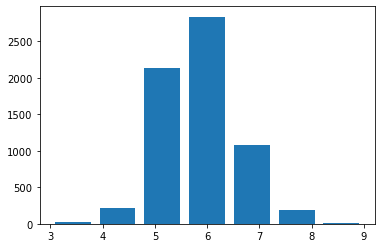

In [8]:
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

In [9]:
# 데이터의 양이 적고, 범주의 수가 너무 많으며, 각 데이터의 숫자가 차이나기 때문에, 범주를 크게 세가지로 분류한다.
# loc은 특정한 데이터의 인덱스를 골라내는 역할을 하며, 쉼표가 들어가면 차례대로 행, 열을 의미한다.
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [10]:
data = [['Apple', 11], ['Banana', 23], ['Coconut', 35]]
df = pd.DataFrame(data, columns=['Fruit', 'Count'])
print(df)
print()
print(df.loc[0])
print()
print(df.loc[0, 'Fruit'])

     Fruit  Count
0    Apple     11
1   Banana     23
2  Coconut     35

Fruit    Apple
Count       11
Name: 0, dtype: object

Apple


In [12]:
df.loc[df['Fruit'] == 'Apple']

,Fruit,Count
0,Apple,11


In [13]:
import tensorflow as tf
del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Train on 3897 samples, validate on 1300 samples
Epoch 1/25
3897/3897 [==============================] - 0s 89us/sample - loss: 0.4886 - accuracy: 0.7898 - val_loss: 0.4507 - val_accuracy: 0.7908
Epoch 2/25
3897/3897 [==============================] - 0s 28us/sample - loss: 0.4585 - accuracy: 0.8014 - val_loss: 0.4344 - val_accuracy: 0.7908
Epoch 3/25
3897/3897 [==============================] - 0s 28us/sample - loss: 0.4154 - accuracy: 0.8029 - val_loss: 0.4322 - val_accuracy: 0.7877
Epoch 4/25
3897/3897 [==============================] - 0s 28us/sample - loss: 0.4375 - accuracy: 0.7957 - val_loss: 0.4318 - val_accuracy: 0.7908
Epoch 5/25
3897/3897 [==============================] - 0s 27us/sample - loss: 0.4213 - accuracy: 0.7975 - val_loss: 0.4529 - val_accuracy: 0.7908
Epoch 6/25
3897/3897 [==============================] - 0s 30us/sample - loss: 0.4167 - accuracy: 0.8052 - val_loss: 0.5011 - val_accuracy: 0.7100
Epoch 7/25
3897/3897 [==============================] - 0s 28us/sample

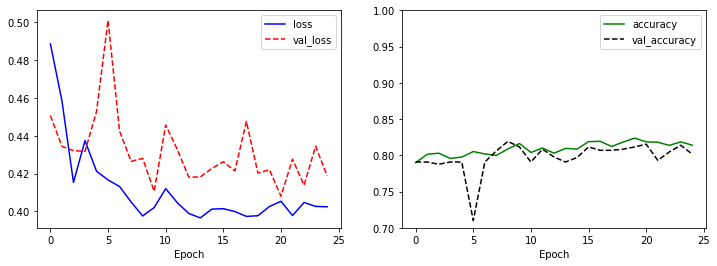

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [16]:
model.evaluate(test_X, test_Y)

1300/1300 [==============================] - 0s 16us/sample - loss: 0.3992 - accuracy: 0.8146


[0.3992458219711597, 0.81461537]